## pyCELP Alignment vs Electron Density (recreates Schad & Dima (2020) Figure 4) 

 - written by Tom Schad 

In [1]:
import numpy as np
import pycelp
from scipy.io import readsav
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='rkbgym')
mpl.rcParams.update({
    "font.size":14,        
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [2]:
## do pycelp calculations for 27 levels 
fe14 = pycelp.Ion('fe_14',nlevels = 27)
fe13 = pycelp.Ion('fe_13',nlevels = 27)
fe11 = pycelp.Ion('fe_11',nlevels = 27)
si10 = pycelp.Ion('si_10',nlevels = 27)
si9 = pycelp.Ion('si_9',nlevels = 27)
models = fe14,fe11,fe13,fe13,si10,si9

wvls = 5303,7892,10746,10798,14301,39343
rphot = 0.5
iontemps =  10.**np.array([6.3,6.1,6.25,6.25,6.15,6.05])
vv =  np.rad2deg(np.arccos(1./np.sqrt(3.)))  ## Van Vleck
thetabs = [0,vv,90]

dens = 10.**np.linspace(5,15,30)
nd = len(dens)
py_align = np.zeros((6,3,nd,2))

for n in range(6):
    for t,thetab in enumerate(thetabs):
        for d,dens0 in enumerate(dens):
            models[n].calc(dens0,iontemps[n],rphot,thetab,include_limbdark = True,include_protons = True)
            py_align[n,t,d,0]  = models[n].get_upper_level_alignment(wvls[n])

 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.wgfa
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.scups
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.psplups
 using default abundances: /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 reading:  /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 testing default file: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 reading:  /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 setting up electron collision rate factors
 setting up proton  collision rate factors
 setting up non-dipole radiative rate factors
 getting non-dipole rate factors
 setting up dipole radiative rate factors
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.wgfa
 reading:  /usr/

In [3]:
## do pycelp calculations for 100 levels 
fe14 = pycelp.Ion('fe_14',nlevels = 100)
fe13 = pycelp.Ion('fe_13',nlevels = 100)
fe11 = pycelp.Ion('fe_11',nlevels = 100)
si10 = pycelp.Ion('si_10',nlevels = 100)
si9 = pycelp.Ion('si_9')
models = fe14,fe11,fe13,fe13,si10,si9

for n in range(6):
    for t,thetab in enumerate(thetabs):
        for d,dens0 in enumerate(dens):
            models[n].calc(dens0,iontemps[n],rphot,thetab,include_limbdark = True,include_protons = True)
            py_align[n,t,d,1]  = models[n].get_upper_level_alignment(wvls[n])

 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.wgfa
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.scups
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.psplups
 using default abundances: /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 reading:  /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 testing default file: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 reading:  /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 setting up electron collision rate factors
 setting up proton  collision rate factors
 setting up non-dipole radiative rate factors
 getting non-dipole rate factors
 setting up dipole radiative rate factors
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.wgfa
 reading:  /usr/

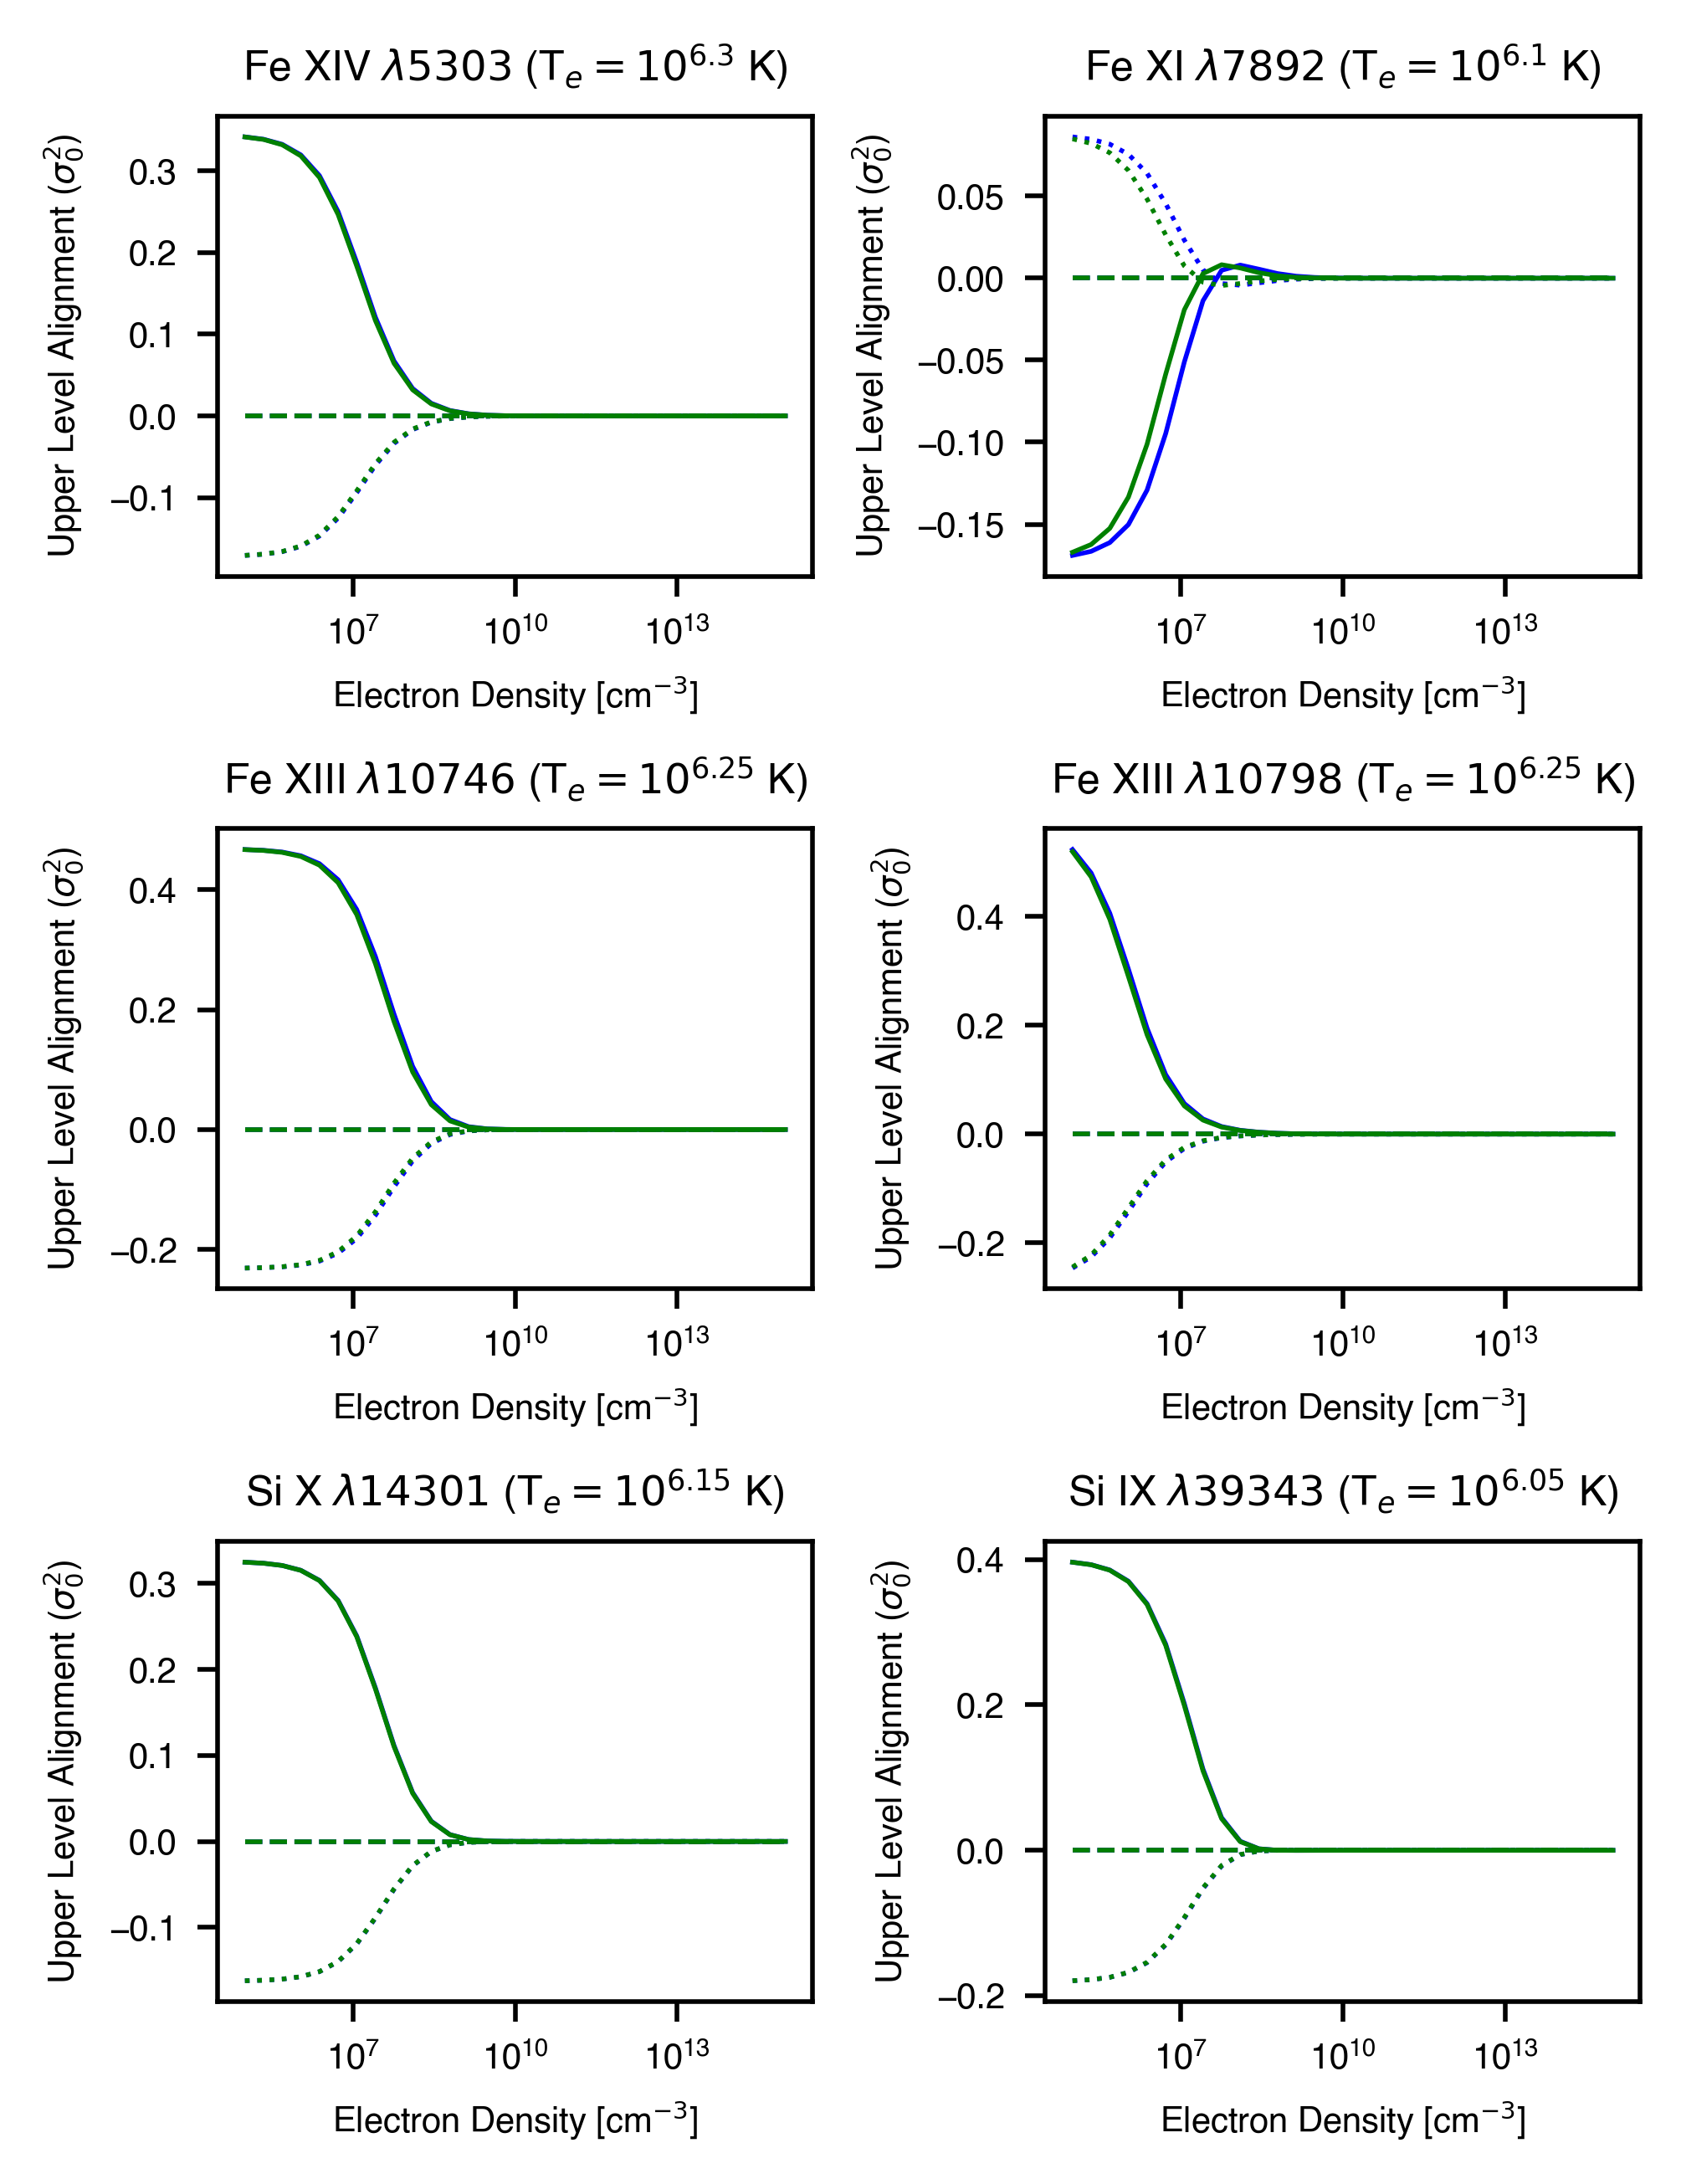

In [4]:
### PLOTTING
titles = r'Fe XIV $\lambda5303$ (T$_{e} = 10^{6.3}$ K)', \
        r'Fe XI $\lambda7892$ (T$_{e} = 10^{6.1}$ K)', \
        r'Fe XIII $\lambda10746$ (T$_{e} = 10^{6.25}$ K)',\
        r'Fe XIII $\lambda10798$ (T$_{e} = 10^{6.25}$ K)',\
        r'Si X $\lambda14301$ (T$_{e} = 10^{6.15}$ K)',\
        r'Si IX $\lambda39343$ (T$_{e} = 10^{6.05}$ K)',

mpl.rcParams.update({
    "font.size":6,        
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

width, height = plt.figaspect(1.3)
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(width,height), dpi=500)
ax = ax.flatten()

lw0 = 0.8
for n in range(6):
    ax[n].plot(dens,py_align[n,0,:,0],color = 'blue',lw = lw0,linestyle = 'solid')
    ax[n].plot(dens,py_align[n,1,:,0],color = 'blue',lw = lw0,linestyle = 'dashed')
    ax[n].plot(dens,py_align[n,2,:,0],color = 'blue',lw = lw0,linestyle = 'dotted')
    ax[n].plot(dens,py_align[n,0,:,1],color = 'green',lw = lw0,linestyle = 'solid')
    ax[n].plot(dens,py_align[n,1,:,1],color = 'green',lw = lw0,linestyle = 'dashed')
    ax[n].plot(dens,py_align[n,2,:,1],color = 'green',lw = lw0,linestyle = 'dotted')

    ## LABELS
    ax[n].set_xlabel(r'Electron Density [cm$^{-3}$]')
    ax[n].set_ylabel(r'Upper Level Alignment ($\sigma^2_{0}$)')
    ax[n].set_xscale('log')
    ax[n].set_title(titles[n])

for z in range(5): fig.tight_layout()